# Obrada podataka po kanalu prodaje

U ovoj bilježnici nalaze se postupci obrade podataka uzimajući u obzir kanal prodaje. Pokušavamo vidjeti koje su navike gostiju ovisno o pojednim kanalima prodaje.

Prvo počinjemo uvozom potrebnih biblioteka.


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from datetime import datetime

Zatim pronalazimo lokaciju i učitavamo .csv datoteku s podatcima.

In [31]:
curr = Path.cwd()
path = curr.parent.parent
filePath = str(path)
filePath += "/cleaned_data.csv"
#print(filePath)
dataFrame = pd.read_csv(filePath)
dataFrame["datum_dolaska"] = pd.to_datetime(dataFrame["datum_dolaska"]).dt.date
dataFrame["datum_kreiranja_rezervacije"] = pd.to_datetime(dataFrame["datum_kreiranja_rezervacije"]).dt.date
dataFrame["datum_otkazivanja_rezervacije"] = pd.to_datetime(dataFrame["datum_otkazivanja_rezervacije"]).dt.date
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93962 entries, 0 to 93961
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     93962 non-null  int64  
 1   hotel_id                       93962 non-null  int64  
 2   datum_dolaska                  93962 non-null  object 
 3   datum_kreiranja_rezervacije    93962 non-null  object 
 4   datum_odjave                   93962 non-null  object 
 5   datum_otkazivanja_rezervacije  19548 non-null  object 
 6   broj_odraslih_gostiju          93962 non-null  int64  
 7   broj_djece_gostiju             93962 non-null  float64
 8   zemlja_gosta                   93962 non-null  object 
 9   kanal_prodaje_id               93962 non-null  int64  
 10  tip_sobe_id                    93962 non-null  int64  
 11  cijena_nocenja                 93962 non-null  float64
 12  status_rezervacije             93962 non-null 

## Različiti kanali prodaje

Prvo pronalazimo koliko je različitih kanala prodaje te učestalost korištenja pojedinog kanala.
Kanali su nam poznati samo po kodnom broju kanala.

{0: 13414, 1: 5897, 2: 74469, 3: 3, 4: 179}


<BarContainer object of 5 artists>

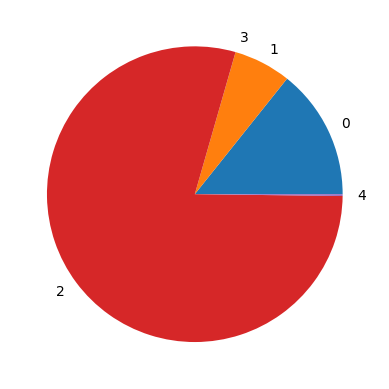

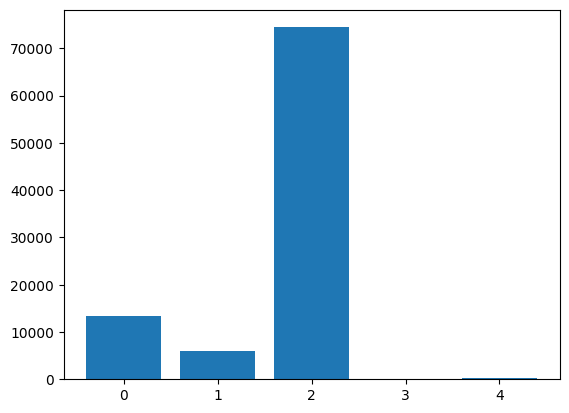

In [32]:
uniqueSalesChannels = set(dataFrame["kanal_prodaje_id"].unique())
#salesChannelsFile = open("salesChannels.txt", "w")
#for channel in dataFrame["kanal_prodaje_id"]:
#    salesChannelsFile.write(str(channel) + " ")
#print (uniqueSalesChannels)
totalSales = len(dataFrame)
salesChannels = {key : 0 for key in uniqueSalesChannels}
for key in dataFrame["kanal_prodaje_id"]:
    salesChannels[key] += 1
print (salesChannels)
#print (sum(salesChannels.values()))
values = list(salesChannels.values())
values[2], values[3] = values[3], values[2]
labels = list(uniqueSalesChannels)
labels[2], labels[3] = labels[3], labels[2]
fig, ax = plt.subplots()
ax.pie(values, labels = labels)
fig, ax = plt.subplots()
ax.bar(labels, values)

Zatim podatke razdvajamo po kanalima prodaje.

In [33]:
dfSalesChannel0 = dataFrame[dataFrame["kanal_prodaje_id"] == 0]
dfSalesChannel1 = dataFrame[dataFrame["kanal_prodaje_id"] == 1]
dfSalesChannel2 = dataFrame[dataFrame["kanal_prodaje_id"] == 2]
dfSalesChannel3 = dataFrame[dataFrame["kanal_prodaje_id"] == 3]
dfSalesChannel4 = dataFrame[dataFrame["kanal_prodaje_id"] == 4]

Za kanal prodaje broj 3 imamo premalo podataka za uspostaviti bilo kakvu korelaciju i konkluziju. Slično i za kanal broj 4.
Za ostale kanale razmatramo moguće korelacije i daljnje modeliranje.


## Korelacija kanala prodaje i učestalosti otkazivanja

Prvo ćemo promatrati kompletnu učestalost otkazivanja rezervacija. Sve podatke razdvajamo u zasebnu godinu jer nas takve korelacije zanimaju.

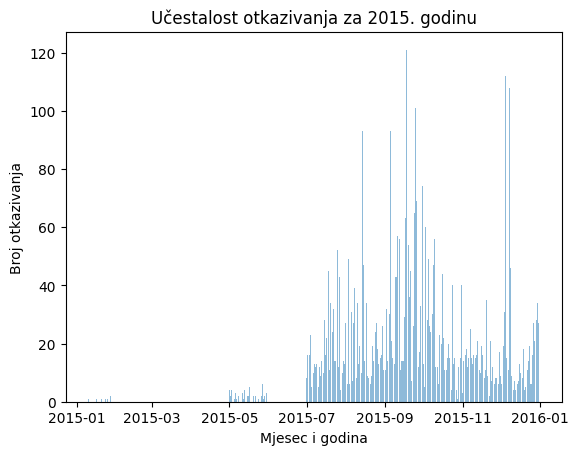

In [34]:
fullCancelDF = dataFrame["status_rezervacije"] == "Canceled"
fullCancelDF = dataFrame[fullCancelDF]
#print(fullCancelDF)

cancelDates = list(date for date in fullCancelDF["datum_dolaska"])
#possibleYears = set(date.year for date in cancelDates)
#print(possibleYears)
cd15 = dict()
for date in cancelDates:
    if date.year == 2015:
        if date in cd15:
            cd15[date] += 1
        else:
            cd15[date] = 1
#print(cd15)
plt.bar(list(cd15.keys()), list(cd15.values()), alpha=0.5)
plt.title("Učestalost otkazivanja za 2015. godinu")
plt.xlabel("Mjesec i godina")
plt.ylabel('Broj otkazivanja')
plt.show()

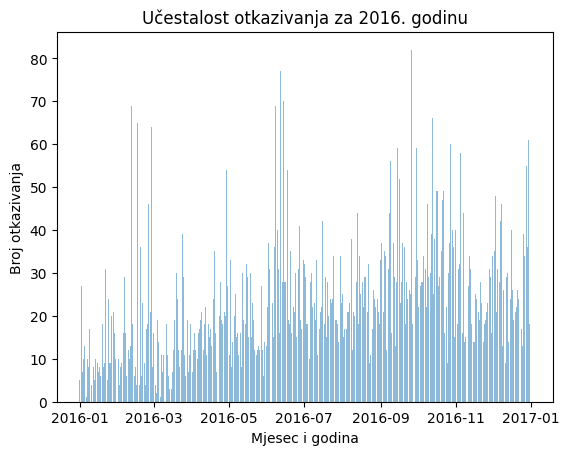

In [35]:
cd16 = dict()
for date in cancelDates:
    if date.year == 2016:
        if date in cd16:
            cd16[date] += 1
        else:
            cd16[date] = 1
#print(cd16)
plt.bar(list(cd16.keys()), list(cd16.values()), alpha=0.5)
plt.title("Učestalost otkazivanja za 2016. godinu")
plt.xlabel("Mjesec i godina")
plt.ylabel('Broj otkazivanja')
plt.show()

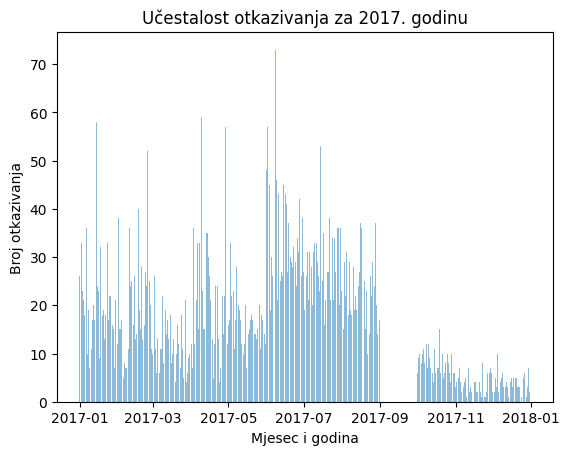

In [36]:
cd17 = dict()
for date in cancelDates:
    if date.year == 2017:
        if date in cd17:
            cd17[date] += 1
        else:
            cd17[date] = 1
#print(cd17)
plt.bar(list(cd17.keys()), list(cd17.values()), alpha=0.5)
plt.title("Učestalost otkazivanja za 2017. godinu")
plt.xlabel("Mjesec i godina")
plt.ylabel('Broj otkazivanja')
plt.show()

Zatim razmatramo učestalost otkazivanja samo za prodajni kanal 0. I opet podatke razdvajamo po godinama.

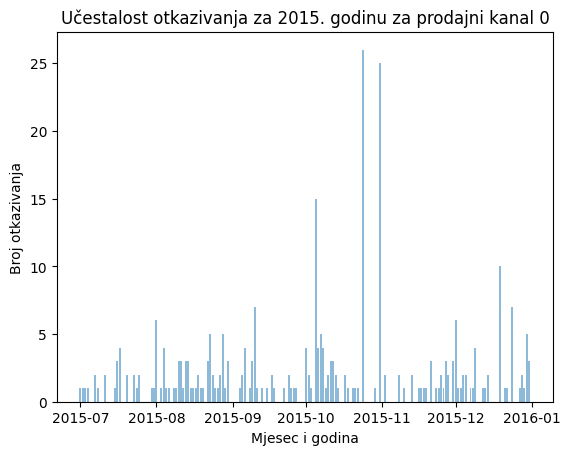

In [37]:
cancelDF0 = dfSalesChannel0["status_rezervacije"] == "Canceled"
cancelDF0 = dfSalesChannel0[cancelDF0]
#print(len(cancelDF0))

cds0 = list(date for date in cancelDF0["datum_dolaska"])
#possibleYears = set(date.year for date in cds0)
#print(possibleYears)
cd015 = dict()
for date in cds0:
    if date.year == 2015:
        if date in cd015:
            cd015[date] += 1
        else:
            cd015[date] = 1
#print(cd015)
plt.bar(list(cd015.keys()), list(cd015.values()), alpha=0.5)
plt.title("Učestalost otkazivanja za 2015. godinu za prodajni kanal 0")
plt.xlabel("Mjesec i godina")
plt.ylabel('Broj otkazivanja')
plt.show()

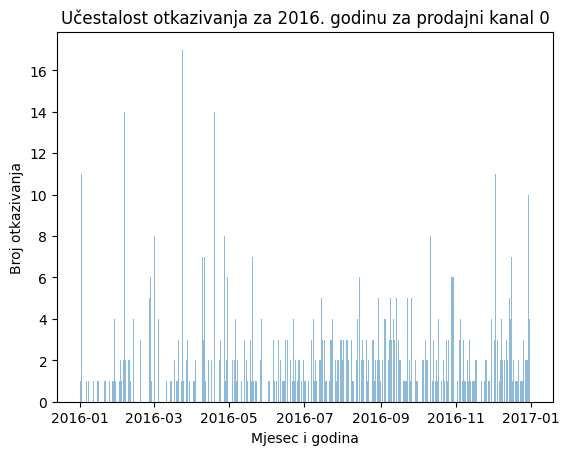

In [38]:
cd016 = dict()
for date in cds0:
    if date.year == 2016:
        if date in cd016:
            cd016[date] += 1
        else:
            cd016[date] = 1
#print(cd016)
plt.bar(list(cd016.keys()), list(cd016.values()), alpha=0.5)
plt.title("Učestalost otkazivanja za 2016. godinu za prodajni kanal 0")
plt.xlabel("Mjesec i godina")
plt.ylabel('Broj otkazivanja')
plt.show()

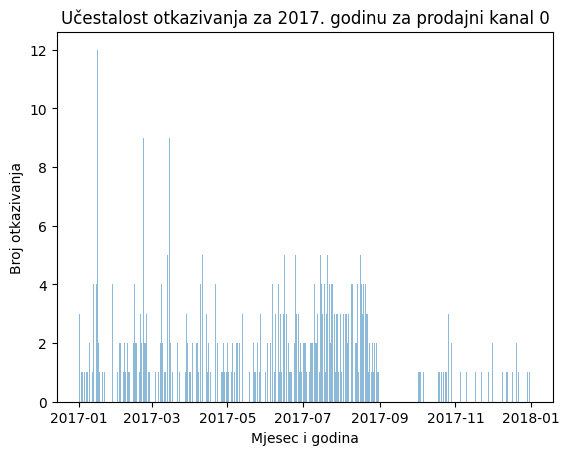

In [39]:
cd017 = dict()
for date in cds0:
    if date.year == 2017:
        if date in cd017:
            cd017[date] += 1
        else:
            cd017[date] = 1
#print(cd017)
plt.bar(list(cd017.keys()), list(cd017.values()), alpha=0.5)
plt.title("Učestalost otkazivanja za 2017. godinu za prodajni kanal 0")
plt.xlabel("Mjesec i godina")
plt.ylabel('Broj otkazivanja')
plt.show()

Nakon razmatramo učestalost otkazivanja za prodajni kanal 1. I opet podatke razdvajamo po godinama.

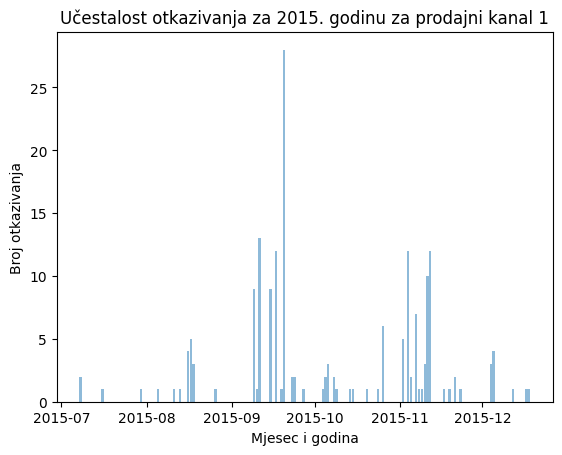

In [40]:
cancelDF1 = dfSalesChannel1["status_rezervacije"] == "Canceled"
cancelDF1 = dfSalesChannel1[cancelDF1]
#print(len(cancelDF1))

cds1 = list(date for date in cancelDF1["datum_dolaska"])
#possibleYears = set(date.year for date in cds1)
#print(possibleYears)
cd115 = dict()
for date in cds1:
    if date.year == 2015:
        if date in cd115:
            cd115[date] += 1
        else:
            cd115[date] = 1
#print(cd115)
plt.bar(list(cd115.keys()), list(cd115.values()), alpha=0.5)
plt.title("Učestalost otkazivanja za 2015. godinu za prodajni kanal 1")
plt.xlabel("Mjesec i godina")
plt.ylabel('Broj otkazivanja')
plt.show()

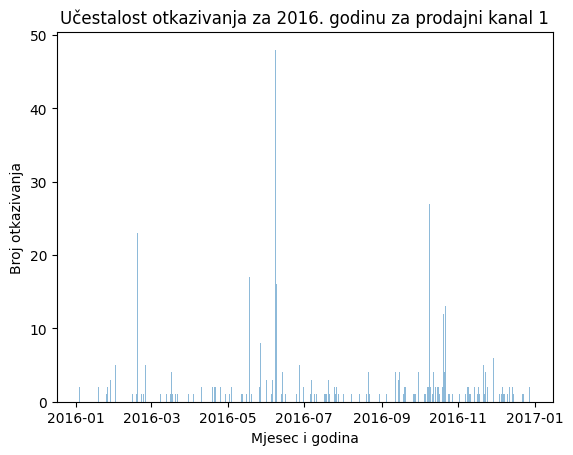

In [41]:
cd116 = dict()
for date in cds1:
    if date.year == 2016:
        if date in cd116:
            cd116[date] += 1
        else:
            cd116[date] = 1
#print(cd116)
plt.bar(list(cd116.keys()), list(cd116.values()), alpha=0.5)
plt.title("Učestalost otkazivanja za 2016. godinu za prodajni kanal 1")
plt.xlabel("Mjesec i godina")
plt.ylabel('Broj otkazivanja')
plt.show()

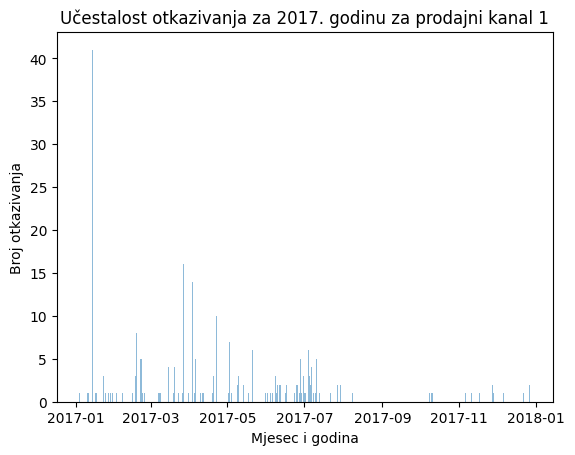

In [42]:
cd117 = dict()
for date in cds1:
    if date.year == 2017:
        if date in cd117:
            cd117[date] += 1
        else:
            cd117[date] = 1
#print(cd117)
plt.bar(list(cd117.keys()), list(cd117.values()), alpha=0.5)
plt.title("Učestalost otkazivanja za 2017. godinu za prodajni kanal 1")
plt.xlabel("Mjesec i godina")
plt.ylabel('Broj otkazivanja')
plt.show()

Te nakon toga razmatramo učestalost otkazivanja za prodajni kanal 2. I opet razdvajamo podatke po godinama.

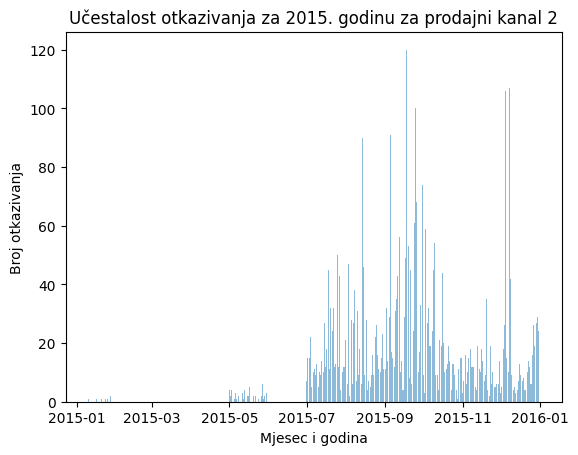

In [43]:
cancelDF2 = dfSalesChannel2["status_rezervacije"] == "Canceled"
cancelDF2 = dfSalesChannel2[cancelDF2]
#print(len(cancelDF2))

cds2 = list(date for date in cancelDF2["datum_dolaska"])
#possibleYears = set(date.year for date in cds1)
#print(possibleYears)
cd215 = dict()
for date in cds2:
    if date.year == 2015:
        if date in cd215:
            cd215[date] += 1
        else:
            cd215[date] = 1
#print(cd215)
plt.bar(list(cd215.keys()), list(cd215.values()), alpha=0.5)
plt.title("Učestalost otkazivanja za 2015. godinu za prodajni kanal 2")
plt.xlabel("Mjesec i godina")
plt.ylabel('Broj otkazivanja')
plt.show()

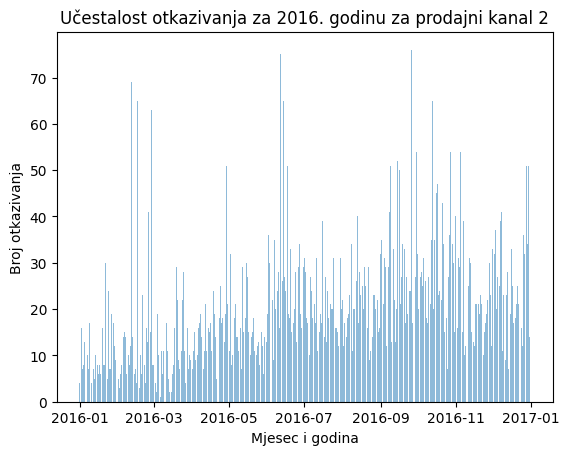

In [44]:
cd216 = dict()
for date in cds2:
    if date.year == 2016:
        if date in cd216:
            cd216[date] += 1
        else:
            cd216[date] = 1
#print(cd216)
plt.bar(list(cd216.keys()), list(cd216.values()), alpha=0.5)
plt.title("Učestalost otkazivanja za 2016. godinu za prodajni kanal 2")
plt.xlabel("Mjesec i godina")
plt.ylabel('Broj otkazivanja')
plt.show()

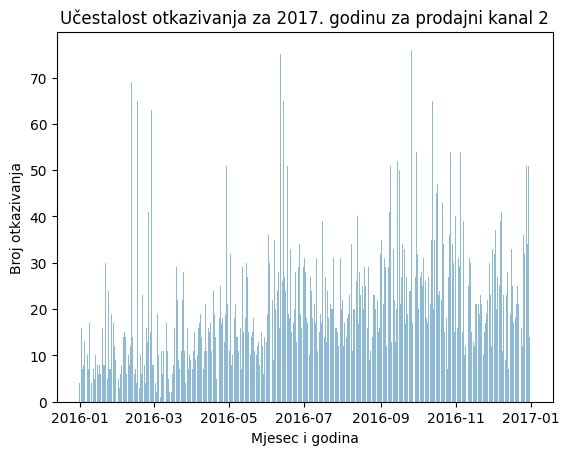

In [45]:
cd217 = dict()
for date in cds2:
    if date.year == 2016:
        if date in cd217:
            cd217[date] += 1
        else:
            cd217[date] = 1
#print(cd217)
plt.bar(list(cd217.keys()), list(cd217.values()), alpha=0.5)
plt.title("Učestalost otkazivanja za 2017. godinu za prodajni kanal 2")
plt.xlabel("Mjesec i godina")
plt.ylabel('Broj otkazivanja')
plt.show()

## Korelacija kanala prodaje i broja gostiju